## Project 2 Monte Carlo Simulation



### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import pandas as pd
import yfinance as yf
from MCForecastTools import MCSimulation

In [2]:
# Import warnings to ignore warnings
import warnings

warnings.filterwarnings('ignore')

In [45]:
# import yfinance "SPY"

spy = yf.Ticker("SPY")


In [46]:
# import yfinance "AGG"

agg = yf.Ticker("AGG")


### Get Past 6 months worth of SP500 and GOVT Price Data via Y Finance

In [47]:
# Set the ticker information
tickers = ["SPY","AGG"]

# Set timeframe to "15Min"
timeframe = "15Min"

# Set start and end datetimes between now and 6 month back.
# start_date = pd.Timestamp("2023-07-11", tz="America/New_York").isoformat()
# end_date = pd.Timestamp("2023-08-02", tz="America/New_York").isoformat()



# Get 6 month's worth of historical price data for SP500 and GOVT
SPY = yf.download("SPY", period="6mo")
    # tickers,
    # timeframe,
    # start=start_date,
    # end=end_date
# ).df

# # Display sample data
# display(df_ticker.head())
# display(df_ticker.tail())

[*********************100%%**********************]  1 of 1 completed


In [48]:
# Rewrite the column names
columns = ["open", "high", "low", "close", "adj close", "volume"]
SPY.columns = columns
SPY.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2023-04-04,411.619995,411.920013,407.239990,408.670013,405.726440,66601500
2023-04-05,407.910004,408.700012,405.880005,407.600006,404.664154,65200200
2023-04-06,406.769989,409.480011,405.679993,409.190002,406.242676,63743300
2023-04-10,406.609985,409.690002,405.970001,409.609985,406.659637,63681000
2023-04-11,410.260010,411.179993,408.920013,409.720001,406.768860,59297900


In [52]:
AGG= yf.download("AGG", period="5mo")

[*********************100%%**********************]  1 of 1 completed


In [53]:
# Rewrite the column names
columns = ["open", "high", "low", "close", "adj close", "volume"]
AGG.columns = columns
AGG.head()

,open,high,low,close,adj close,volume
Date,,,,,,
2023-05-04,99.769997,100.419998,99.750000,99.970001,98.642265,5262200
2023-05-05,99.639999,99.720001,99.449997,99.650002,98.326515,4003000
2023-05-08,99.209999,99.349998,99.080002,99.099998,97.783798,5481300
2023-05-09,99.110001,99.190002,99.010002,99.010002,97.695007,5712200
2023-05-10,99.430000,99.680000,99.389999,99.650002,98.326515,4803000


In [54]:
# Concatenate the ticker DataFrames
df_ticker = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
df_ticker.info

<bound method DataFrame.info of                    SPY                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2023-04-04  411.619995  411.920013  407.239990  408.670013  405.726440   
2023-04-05  407.910004  408.700012  405.880005  407.600006  404.664154   
2023-04-06  406.769989  409.480011  405.679993  409.190002  406.242676   
2023-04-10  406.609985  409.690002  405.970001  409.609985  406.659637   
2023-04-11  410.260010  411.179993  408.920013  409.720001  406.768860   
...                ...         ...         ...         ...         ...   
2023-09-27  427.089996  427.670013  422.290009  426.049988  426.049988   
2023-09-28  425.480011  430.250000  424.869995  428.519989  428.519989   
2023-09-29  431.670013  431.850006  425.910004  427.480011  427.480011   
2023-10-02  426.619995  428.600006  424.459991  427.309998  427.309998   
2023-1

<Axes: xlabel='Date'>

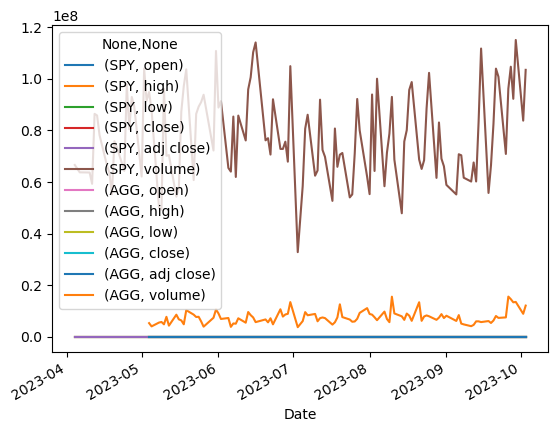

In [55]:
# Plot daily returns of all portfolios
display(df_ticker.plot())

### Run 6 months portfolio growth using Monte Carlo simulation


Build (5) portfolios, corresponding to different benchmark risk/reward levels


Conservative 100/0% (Bonds/Stocks) ("SPY"SP500 Index/"AGG" BondETF)
Moderately Conservative* 60/40%
Moderate 40/60%
Moderately Aggressive  20/80%
Aggressive 0/100%


In [56]:


# # Configuring a Monte Carlo simulation to forecast 6 months cumulative returns
# # use 500 runs and 40(AGG)/60(SPY) portfolio.
MC_six_months = MCSimulation(portfolio_data = 
    df_ticker,
    # portfolio_data = pd.DataFrame,
    weights = [.40, .60],
    num_simulation = 500,
    num_trading_days = 252
)

In [60]:
MC_sixmonths.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.995986,0.994470,1.004087,1.000196,0.994115,1.005001,1.004090,0.993054,1.001040,0.990484,...,1.000553,1.008218,0.994741,0.996303,0.994843,1.005277,0.998104,0.995059,1.005183,0.999481
2,0.998966,1.006886,1.009540,1.011153,0.993300,1.005943,1.001336,1.004105,1.003168,0.983564,...,1.006071,1.006267,0.998891,0.998461,0.995395,1.010083,1.004186,0.994589,1.003926,1.005318
3,0.990118,0.999631,1.010848,1.019637,0.999043,1.012645,1.001469,1.009042,1.009554,0.974826,...,1.009527,1.005840,0.989320,0.999625,0.990505,1.004711,1.006989,0.999079,1.005654,1.004829
4,0.987848,1.003550,1.012798,1.025621,0.998411,1.007637,1.000442,1.009653,1.008596,0.977512,...,1.005213,1.000445,0.989630,0.993436,0.993994,0.997427,1.002001,0.999420,1.002301,1.002798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,0.918708,1.002437,1.087586,1.001690,1.079419,1.042059,0.899461,0.994169,0.926977,0.970989,...,1.051542,1.053370,0.990907,1.019110,0.914901,0.964625,0.952520,0.902166,1.007466,1.048952
123,0.918945,1.005323,1.085602,0.997291,1.083192,1.054383,0.899802,0.992286,0.933307,0.974081,...,1.050167,1.056140,0.998274,1.006896,0.914898,0.962866,0.955220,0.896634,1.012783,1.046132
124,0.919923,0.999860,1.091341,0.990987,1.091751,1.049495,0.901840,0.992527,0.938879,0.964859,...,1.053446,1.060532,0.997474,1.005966,0.914657,0.968532,0.953736,0.894844,1.015409,1.043959
125,0.920210,1.001065,1.100014,0.991363,1.093621,1.042107,0.899690,0.997321,0.931443,0.965187,...,1.052866,1.051608,1.002039,1.004520,0.917416,0.970040,0.958909,0.889270,1.018125,1.041567


In [61]:
# Printing the simulation input data
MC_six_months.portfolio_data.head()


SPY                                                  \
                  open        high         low       close   adj close   
Date                                                                     
2023-04-04  411.619995  411.920013  407.239990  408.670013  405.726440   
2023-04-05  407.910004  408.700012  405.880005  407.600006  404.664154   
2023-04-06  406.769989  409.480011  405.679993  409.190002  406.242676   
2023-04-10  406.609985  409.690002  405.970001  409.609985  406.659637   
2023-04-11  410.260010  411.179993  408.920013  409.720001  406.768860   

                                   AGG                                  \
              volume daily_return open high low close adj close volume   
Date                                                                     
2023-04-04  66601500          NaN  NaN  NaN NaN   NaN       NaN    NaN   
2023-04-05  65200200    -0.002618  NaN  NaN NaN   NaN       NaN    NaN   
2023-04-06  63743300     0.003901  NaN  NaN NaN   NaN       NaN    NaN   
2023-04-10  63681000     0.001026  NaN  NaN NaN   NaN       NaN    NaN   
2023-04-11  59297900     0.000269  NaN  NaN NaN   NaN       NaN    NaN   

                         
           daily_return  
Date                     
2023-04-04          NaN  
2023-04-05          NaN  
2023-04-06          NaN  
2023-04-10          NaN  
2023-04-11          NaN

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

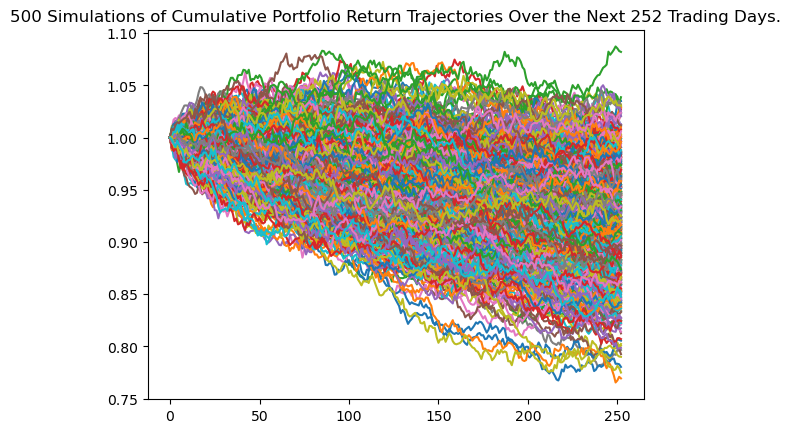

In [62]:
# Plot simulation outcomes
line_plot = MC_six_months.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_sixmonths_sim_plot.png", bbox_inches="tight")

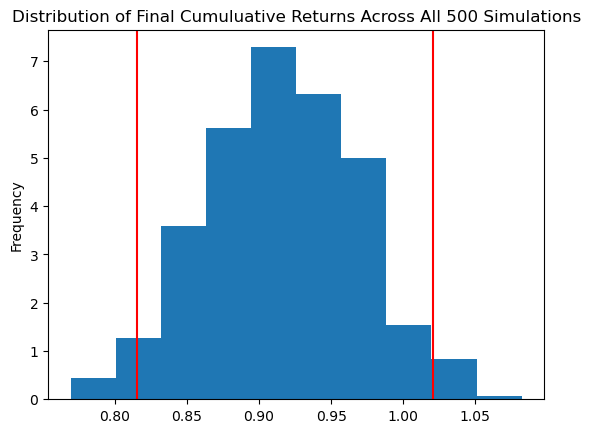

In [63]:
# Plot probability distribution and confidence intervals
dist_plot = MC_six_months.plot_distribution()

# Save the plot for future usage
dist_plot.get_figure().savefig('MC_sixmonths_dist_plot.png',bbox_inches='tight')

In [64]:
# Fetch summary statistics from the Monte Carlo simulation results
forecast_sumstat = MC_six_months.summarize_cumulative_return()

# Print summary statistics
forecast_sumstat

count           500.000000
mean              0.916455
std               0.052970
min               0.769346
25%               0.880366
50%               0.918530
75%               0.952992
max               1.082081
95% CI Lower      0.815611
95% CI Upper      1.020585
Name: 252, dtype: float64